# Telecom Churn - Group Case Study

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

##### Understanding and defining churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file

Churn = pd.read_csv('telecom_churn_data.csv')
Churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# checking shape of the data
Churn.shape

(99999, 226)

In [4]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Checking for duplicate rows
sum(Churn.duplicated(subset = 'mobile_number'))

0

In [6]:
Churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Cleaning

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
Churn.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
# checking the null values  
Churn.isnull().sum()*100/Churn.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [9]:
# missing values in rows
Churn.isnull().sum(axis=1)

0         97
1         20
2         30
3         40
4         30
5         40
6         40
7         69
8         20
9         30
10        49
11        31
12        40
13        30
14        40
15        69
16        40
17        40
18        40
19        10
20        40
21        40
22        40
23        10
24        40
25        40
26        40
27        40
28        30
29        69
30        40
31        40
32        49
33         0
34        10
35       127
36        40
37        69
38        30
39         0
40        20
41        40
42        40
43        40
44         0
45       127
46        30
47        20
48        40
49        40
50        40
51        70
52        11
53         0
54        40
55        20
56         0
57         0
58        40
59        40
60        40
61         0
62        30
63        10
64        30
65        40
66        40
67        51
68        99
69        40
70        40
71        30
72        41
73        30
74        40
75        40
76        40

In [10]:
# dropping all the date columns as it irrelevent 
Churn.drop(['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ],axis='columns', inplace=True)
Churn.shape

(99999, 214)

In [11]:
# dropping ID columns as it is not required  
Churn.drop(['mobile_number', 'circle_id'],axis='columns', inplace=True)
Churn.shape

(99999, 212)

#### Missing values imputation

In [12]:
# list of recharge columns where we will impute missing values with zeroes
zero_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# impute missing values with 0
Churn[zero_col] = Churn[zero_col].apply(lambda x: x.fillna(0))

In [13]:
# Replace NaN values in categorical variables with Mode
Churn.fillna(Churn.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [14]:
# checking the null values  
Churn.isnull().sum()*100/Churn.shape[0]

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [15]:
# Dropping columns more than 50% missing values 
Churn  = Churn.loc[:, Churn.isnull().mean() < .5]

In [16]:
c_cols = Churn.columns
print('Total Columns :',len(c_cols))

Total Columns : 188


In [17]:
# using SimpleImputer to impute missing values for remaining columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(Churn.values)
imputed  = imputer.transform(Churn.values)
print(imputed)

[[   0.      0.      0.   ...    0.    101.2     3.58]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      4.17    0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ... 1151.03 1173.18    0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [18]:
# convert imputed numpy array to pandas dataframe
Churn = pd.DataFrame(imputed, columns = c_cols)
print(Churn.isnull().sum()*100/Churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

#### Data preparation

#### Filter high-value customers

- High-value customers as follows: Those who have recharged with an amount more than or equal to X,
- where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [19]:
# Identifing columns for recharge ('rech')
rech = [x for x in list(Churn) if 'rech' in x]
print(rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [20]:
# total data recharge amount for June and July is  number of recharges * average recharge amount
Churn['total_data_rech_6'] = Churn.total_rech_data_6 * Churn.av_rech_amt_data_6
Churn['total_data_rech_7'] = Churn.total_rech_data_7 * Churn.av_rech_amt_data_7

In [21]:
# total recharge amount for June and July is call recharge amount + data recharge amount
Churn['amt_data_6'] = Churn.total_rech_amt_6 + Churn.total_data_rech_6
Churn['amt_data_7'] = Churn.total_rech_amt_7 + Churn.total_data_rech_7

In [22]:
#  average recharge by customers in  first two months (the good phase).
Churn['avg_amt_data_6_7'] = (Churn.amt_data_6 + Churn.amt_data_7)/2

In [23]:
#  the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(Churn.avg_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [24]:
# Those who have recharged with an amount more than or equal to the 70th percentile 
Churn_Filtered = Churn.loc[Churn.avg_amt_data_6_7 >= Churn.avg_amt_data_6_7.quantile(0.7), :]
Churn_Filtered = Churn_Filtered.reset_index(drop=True)
Churn_Filtered.shape

(30001, 193)

In [25]:
# dropping the variables created to filter high-value customers
Churn_Filtered = Churn_Filtered.drop(['total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7', 'avg_amt_data_6_7'], axis=1)
Churn_Filtered.shape

(30001, 188)

In [26]:
print("Percentage High-value users in data : {}%".format(round(len(Churn_Filtered)/Churn.shape[0]*100),2))

Percentage High-value users in data : 30%


In [27]:
# After filtering the high-value customers we got about 30001 rows
def ChurnStatus(data,churn_Month=9):
    Churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    f = ~data[[s + str(churn_Month) for s in Churn_features ]].any(axis=1)
    f = f.map({True:1, False:0})
    return f

In [28]:
Churn_Filtered['churn'] = ChurnStatus(Churn_Filtered,9)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(Churn_Filtered[Churn_Filtered.churn == 1]),Churn_Filtered.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(Churn_Filtered[Churn_Filtered.churn == 1])/Churn_Filtered.shape[0] *100,2)))

There are 2441 users tagged as churners out of 30001 High-Value Customers.
High-value Churn Percentage : 8.14%


In [29]:
# Churn ratio
print("Churn Ratio:")
print(Churn_Filtered.churn.value_counts()*100/Churn_Filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [30]:
Churn_Filtered = Churn_Filtered.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], 1)

In [31]:
# After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
cols_9List = Churn_Filtered.filter(regex=('_9')).columns
Churn_Filtered.drop(
    cols_9List,axis=1,inplace=True)
Churn_Filtered.shape

(30001, 141)

In [32]:
Churn_Filtered.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,263.198136,270.211922,239.317807,377.289670,381.630159,342.769415,16.291107,12.770483,12.785940

In [33]:
#Removing the outliers above using soft capping 
cols = [col for col in list(Churn_Filtered) if col not in ['churn']]

for col in cols:
    p = Churn_Filtered[col].quantile([0.01,0.99]).values
    Churn_Filtered[col][Churn_Filtered[col] <= p[0]] = p[0]
    Churn_Filtered[col][Churn_Filtered[col] >= p[1]] = p[1]

In [34]:
Churn_Filtered.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

# From below statistics we can  see outliers are treated. 

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.809784,551.084737,498.243103,254.571147,261.016284,230.100840,369.488789,373.043985,332.731326,13.75368,9.764286,10.049318,2

### EDA

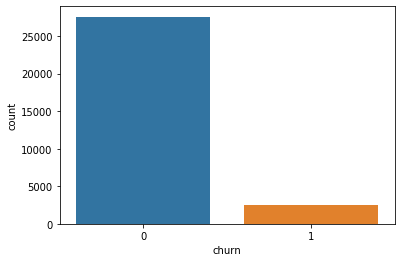

In [35]:
# Churn ratio
sns.countplot(x='churn', data=Churn_Filtered)
plt.show()

# it is clear there is class imbalance 

count    30001.000000
mean      1208.736642
std        955.770584
min        188.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       3651.000000
Name: aon, dtype: float64


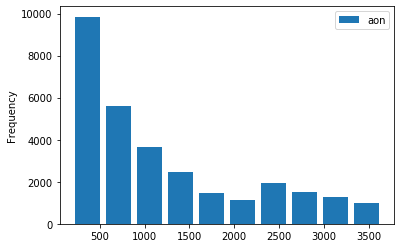

In [36]:
# Customers distribution of the age on network
print(Churn_Filtered.aon.describe())
Churn_Filtered[['aon']].plot(kind='hist',rwidth=0.8)
plt.show()

# Minimun Age on network is 180 days.
# Average age on network for customers is 1209 days 

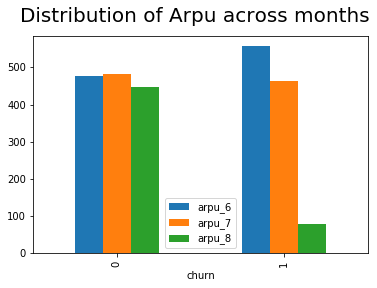

In [37]:
#churn=1, else 0
# arpu = Average revenue per user
Churn_Filtered['churn'] = Churn_Filtered['churn'].astype('object', copy = False)
C_sample = Churn_Filtered.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
C_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

# as per below plot  focus should be on customer with low average revenue as churner are detected.

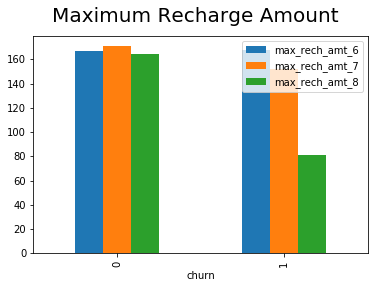

In [38]:
# Maximun recharge amount 
C_sample = Churn_Filtered.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
C_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()

# as per below plot focus on the customer whoes Avg max recharge amount has been decreased

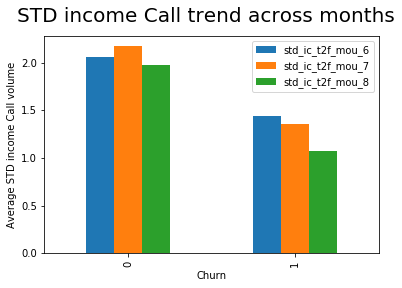

In [39]:
#STD calls - outside the calling circle - Incoming calls - Operator T to fixed lines of T
C_sample = Churn_Filtered.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
C_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()
# Churn rate is higher when STD incoming call are decreasing, focus should be on customer with lower STD incoming call amount  for that month.

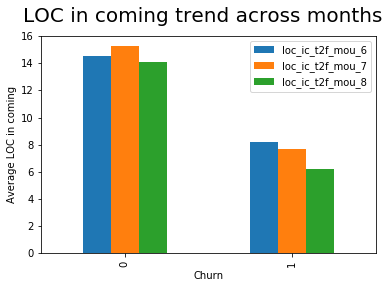

In [40]:
#  within same telecom circle-Incoming calls-Operator T to fixed lines of T
C_sample = Churn_Filtered.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
C_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()
# as per below plot churners are less compared to other factors 

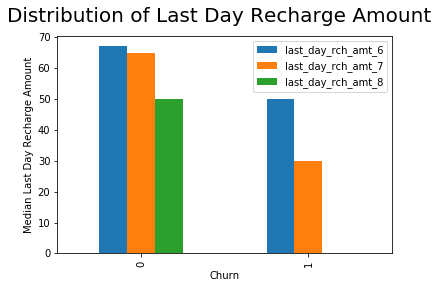

In [41]:
#last_day_rch_amt
Churn_Filtered['churn'] = Churn_Filtered['churn'].astype('object', copy = False)
C_sample = Churn_Filtered.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
C_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()
#customers who's last day recharge amount has decrased should be looked after i.e customers without any recharge amount. 
# Lower the last day recharge amount higher the churn rate. 

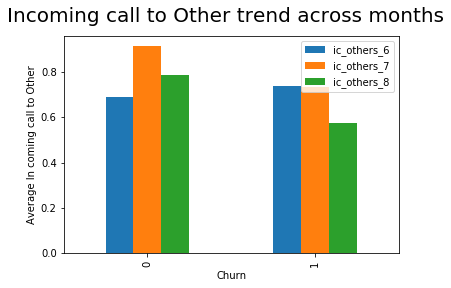

In [109]:
# Incoming call to Other trend across months
C_sample = Churn_Filtered.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
C_sample.plot.bar()
plt.suptitle('Incoming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

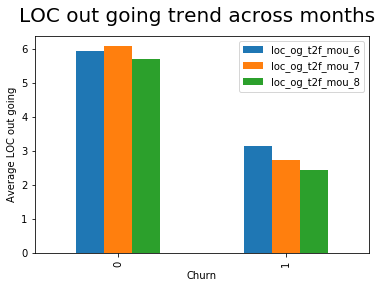

In [43]:
# Local calls - within same telecom circle Outgoing calls
C_sample = Churn_Filtered.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
C_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

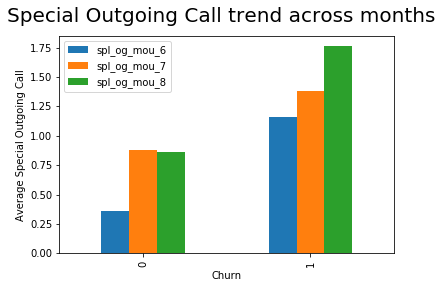

In [44]:
# Special calls outgoing call across months
C_sample = Churn_Filtered.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
C_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()
# as per below plot customer with special call remains to the company 

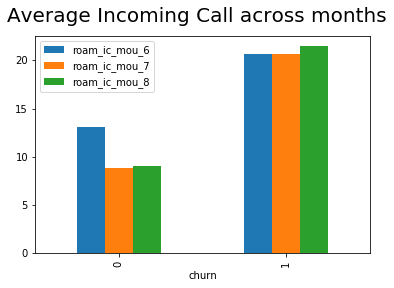

In [45]:
#Average Incoming Call across months
C_sample = Churn_Filtered.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
C_sample.plot.bar()
plt.suptitle('Average Incoming Call across months', fontsize=20)
plt.show()
#Higher the incoming roaming amount, higher is the churn rate. 
#Focus on customers whose incoming roaming amount has increased as they are likely to churn.

### Modelling

In [47]:
# Putting feature variable to X
X = Churn_Filtered.drop(['churn'], axis=1)
y = Churn_Filtered['churn']
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,132.395875,133.670805,0.00,197.935577,197.045133,0.00,9.950013,7.149898,0.00,13.911337,9.818732,0.00,47.100763,46.47301,0.00,93.342088,91.397131,0.00,3.751013,3.792985,0.00,1.123056,1.3685,0.00,144.201175,141.670476,0.00,79.82987,83.299598,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,0.0,0.0,0.0,168.261218,175.221436,0.00,0.798277,0.776572,0.00,3.916811,4.978279,0.00,0.454157,0.030235,0.0,0.00,0.00,0.00,47.922365,47.99052,0.16,107.47565,107.120493,4.13,12.084305,12.599697,1.15,167.491059,167.71954,5.44,9.575993,10.011904,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061557,0.033585,0.0,7.460608,8.334936,0.00,0.854656,1.01296,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58
1,1069.180,1349.850,1986.622,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.38000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0000,0.00,422.160000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,0.0,0.0,0.0,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.26000,27.31,217.56000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,51.380000,34.240000,22.21,0.0,0.0,0.0,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.19000,15.14,5.0,5.0,7.0,1580.0,790.0,2341.0,1000.0,790.0,951.0,0.0,0.0,565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18

In [48]:
X.shape,y.shape

((30001, 140), (30001,))

In [49]:
# Balancing the data using RandomOverSampler
y=y.astype('int')
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=0)
X_over, y_over = over.fit_resample(X, y)
pd.Series(y_over).value_counts()

1    27560
0    27560
Name: churn, dtype: int64

In [50]:
# Test-Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
28557,0.794526,0.925872,1.637370,0.351570,0.236349,0.474305,1.643857,2.580176,2.618681,-0.298137,-0.305059,-0.327656,-0.314905,-0.336001,-0.34949,1.811697,1.511660,1.324652,4.497663,5.214668,5.828581,0.919176,0.563832,0.434172,-0.353562,-0.361453,-0.361332,3.722585,5.303547,4.602401,-0.180524,-0.208963,0.105255,-0.114491,-0.362054,-0.168132,-0.225318,-0.226825,-0.234579,0.0,0.0,0.0,-0.207914,-0.386034,-0.051505,-0.179887,-0.176224,-0.187122,-0.491170,-0.508712,-0.500181,-0.404274,-0.240586,-0.457081,1.395211,1.943178,2.046128,1.671241,1.191917,1.376428,4.400180,5.384091,4.717254,-0.197010,0.703688,0.335096,3.548477,4.487510,3.696593,1.945815,0.655020,2.037028,1.113067,0.049691,0.694909,1.510073,-0.262829,0.315188,0.0,0.0,0.0,1.538239,0.223690,1.195292,3.332631,3.673880,3.404920,-0.445205,-0.247714,-0.294872,-0.009810,0.158963,0.646891,-0.007397,0.175605,-0.277327,-0.382566,-0.829734,-0.348227,0.671013,1.335697,1.341989,1.398956,1.425312,2.899976,2.589345,2.812263,-0.338868,-0.612798,-0.594349,-0.016012,-0.684016,-0.647917,-0.251014,-0.694936,-0.655313,-0.351057,-0.423619,-0.391035,-0.314007,-0.442418,-0.420202,-0.362300,-0.352368,-0.342455,-0.293559,-0.442439,-0.442993,0.171676,-0.374912,-0.354548,-0.297984,-0.289738,-0.269165,-0.212492,1.823743,-0.358921,-0.397900,-0.405212,-0.163477
42695,0.292109,0.897904,-0.644021,-0.474039,-0.298565,-0.451856,0.262177,0.596074,-0.033990,-0.298137,-0.305059,-0.327656,-0.314905,-0.336001,-0.34949,0.100462,0.593791,-0.146229,1.757579,2.693962,0.673002,1.162232,0.003864,-0.285547,-0.353562,-0.361453,-0.361332,1.193685,1.996705,0.351851,-0.509652,-0.490147,-0.409373,-0.527968,-0.455916,-0.323316,-0.225318,-0.226825,-0.234579,0.0,0.0,0.0,-0.682570,-0.619218,-0.467876,-0.179887,-0.176224,-0.187122,2.317141,-0.094351,-0.302780,0.186059,-0.240586,-0.457081,-0.064757,0.280729,-0.148960,0.284423,1.356055,-0.289737,1.432960,2.279865,-0.086745,-0.135446,-0.070876,-0.421452,1.041130,1.9758

#### Logistic regression model

In [52]:
# Model Building
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38584
Model:                            GLM   Df Residuals:                    38449
Model Family:                Binomial   Df Model:                          134
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14475.
Date:                Fri, 02 Apr 2021   Deviance:                       28950.
Time:                        20:22:04   Pearson chi2:                 8.78e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0847      0.019     -4.349      0.000      -0.123      -0.047
arpu_6                 0.0198      0.056      0.354      0.724      -0.090       0.130
arpu_7                 0.2718      0.059      4.595      0.000       0.156       0.388
arpu_8                 0.6167      0.065      9.454      0.000       0.489       0.745
onnet_mou_6            0.2305      0.137      1.676      0.094      -0.039       0.500
onnet_mou_7            0.3657      0.144      2.534      0.011       0.083       0.649
onnet_mou_8           -0.6013      0.118     -5.079      0.000      -0.833      -0.369
offnet_mou_6           0.0668      0.127      0.527      0.598      -0.182       0.315
offnet_mou_7           0.5402      0.171      3.156      0.002       0.205       0.876
offnet_mou_8          -0.1813      0.118     -1.537      0.124      -0.413       0.050
roam_ic_mou_6         -0.0391      0.031     -1.269      0.205      -0.099       0.021
roam_ic_mou_7          0.1155      0.033      3.478      0.001       0.050       0.181
roam_ic_mou_8          0.0192      0.028      0.686      0.493      -0.036       0.074
roam_og_mou_6          0.0095      0.040      0.239      0.811      -0.069       0.088
roam_og_mou_7          0.0133      0.043      0.308      0.758      -0.071       0.098
roam_og_mou_8          0.2449      0.036      6.810      0.000       0.174       0.315
loc_og_t2t_mou_6       0.1489      0.080      1.872      0.061      -0.007       0.305
loc_og_t2t_mou_7      -0.2968      0.087     -3.426      0.001      -0.467      -0.127
loc_og_t2t_mou_8      -0.4799      0.090     -5.357      0.000      -0.656      -0.304
loc_og_t2m_mou_6       0.0658      0.106      0.623      0.533      -0.141       0.273
loc_og_t2m_mou_7      -0.4803      0.119     -4.035      0.000      -0.714      -0.247
loc_og_t2m_mou_8      -0.8253      0.129     -6.376      0.000      -1.079      -0.572
loc_og_t2f_mou_6      -0.0610      0.029     -2.126      0.033      -0.117      -0.005
loc_og_t2f_mou_7      -0.1889      0.031     -6.017      0.000      -0.250      -0.127
loc_og_t2f_mou_8       0.0629      0.028      2.240      0.025       0.008       0.118
loc_og_t2c_mou_6      -0.0189      0.019     -1.011      0.312      -0.056       0.018
loc_og_t2c_mou_7      -0.0832      0.021     -3.985      0.000      -0.124      -0.042
loc_og_t2c_mou_8       0.1050      0.019      5.396      0.000       0.067       0.143
loc_og_mou_6          -0.1008      0.189     -0.534      0.593      -0.471       0.269
loc_og_mou_7           0.1943      0.206      0.943      0.346      -0.209       0.598
loc_og_mou_8           1.8770      0.227      8.279      0.000       1.433       2.321
std_og_t2t_mou_6       0.1742      0.141      1.237      0.216      -0.102       0.450
std_og_t2t_mou_7      -0.4543      0.1

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 104),
 ('arpu_7', True, 1),
 ('arpu_8', False, 25),
 ('onnet_mou_6', False, 14),
 ('onnet_mou_7', False, 26),
 ('onnet_mou_8', False, 10),
 ('offnet_mou_6', False, 101),
 ('offnet_mou_7', False, 18),
 ('offnet_mou_8', False, 24),
 ('roam_ic_mou_6', False, 102),
 ('roam_ic_mou_7', False, 56),
 ('roam_ic_mou_8', False, 111),
 ('roam_og_mou_6', False, 117),
 ('roam_og_mou_7', False, 120),
 ('roam_og_mou_8', False, 11),
 ('loc_og_t2t_mou_6', False, 54),
 ('loc_og_t2t_mou_7', False, 30),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_6', False, 98),
 ('loc_og_t2m_mou_7', False, 20),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 76),
 ('loc_og_t2f_mou_7', False, 34),
 ('loc_og_t2f_mou_8', False, 72),
 ('loc_og_t2c_mou_6', False, 112),
 ('loc_og_t2c_mou_7', False, 78),
 ('loc_og_t2c_mou_8', False, 71),
 ('loc_og_mou_6', False, 100),
 ('loc_og_mou_7', False, 33),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 55),
 ('std_og_t2t_mou_7', False, 22)

In [57]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_rech_data_8', 'max_rech_data_8', 'sep_vbc_3g'],
      dtype='object')

In [58]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

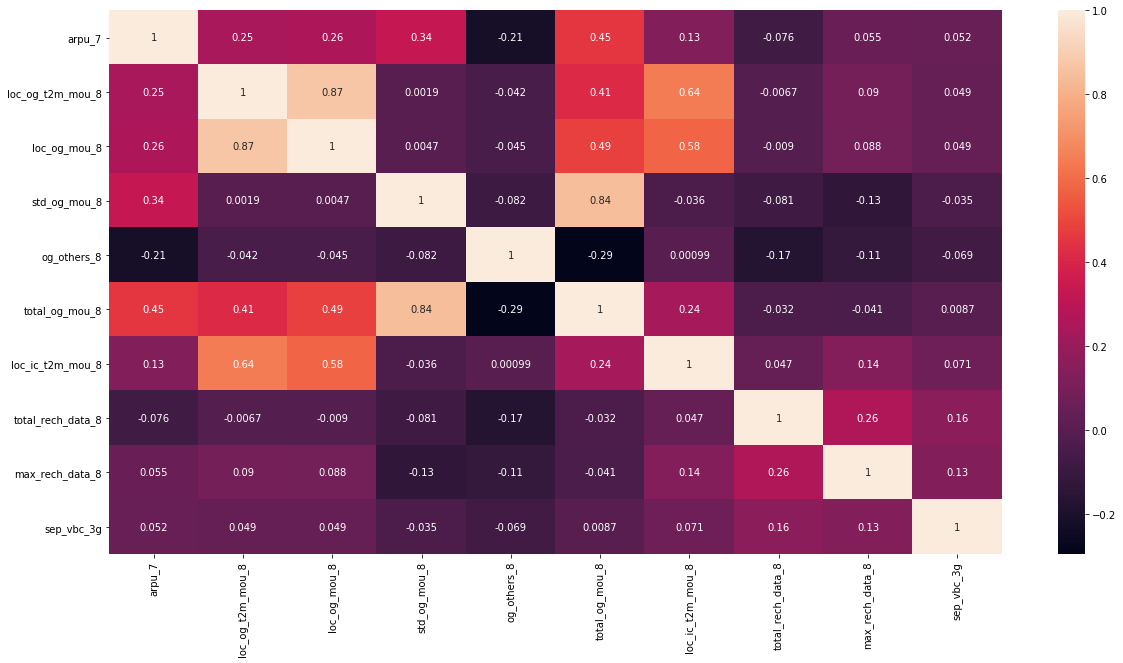

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)

In [60]:
col_for_vif = list(col)
col_for_vif.append('churn')

vif_cal(input_data=Churn_Filtered[col_for_vif], dependent_col='churn')

,Var,Vif
5,total_og_mou_8,98.28
3,std_og_mou_8,56.31
2,loc_og_mou_8,35.69
1,loc_og_t2m_mou_8,7.14
0,arpu_7,3.60
6,loc_ic_t2m_mou_8,2.57
8,max_rech_data_8,1.57
4,og_others_8,1.53
7,total_rech_data_8,1.30
9,sep_vbc_3g,1.09


In [61]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [62]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.81'

In [63]:

#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      8240
           1       0.80      0.75      0.78      8296

    accuracy                           0.78     16536
   macro avg       0.78      0.78      0.78     16536
weighted avg       0.78      0.78      0.78     16536

[[6659 1581]
 [2036 6260]]
accuracy_score :  0.7812651185292695


In [65]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8131696627103014


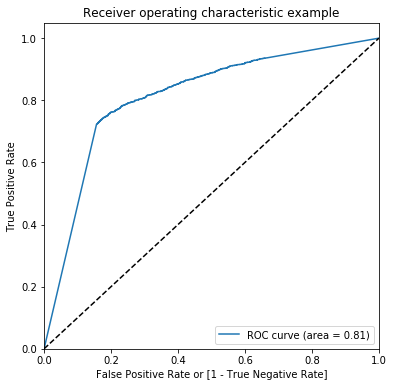

(array([0.        , 0.15631068, 0.15667476, ..., 0.66419903, 0.66432039,
        1.        ]),
 array([0.        , 0.7216731 , 0.72299904, ..., 0.93635487, 0.93635487,
        1.        ]),
 array([2.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
        1.05035886e-308, 7.71384234e-309, 0.00000000e+000]))

In [67]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [68]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.510323e-120,1,0,0,0,0,0,0,0,0,0
1,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1
2,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1
3,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1
4,1,0.000000e+00,0,0,0,0,0,0,0,0,0,0


In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.637034  0.335680  0.936355
0.1   0.1  0.781386  0.805947  0.756991
0.2   0.2  0.781507  0.807160  0.756027
0.3   0.3  0.781447  0.807646  0.755424
0.4   0.4  0.781205  0.808010  0.754581
0.5   0.5  0.781265  0.808131  0.754581
0.6   0.6  0.779995  0.808617  0.751567
0.7   0.7  0.779935  0.808859  0.751205
0.8   0.8  0.780116  0.809587  0.750844
0.9   0.9  0.780600  0.810558  0.750844


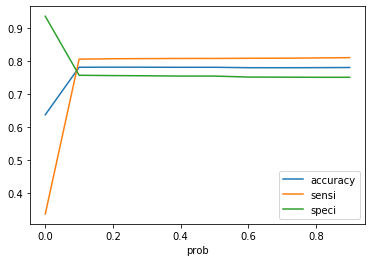

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [71]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [7.668285149267291e-14]


In [72]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

1    8296
0    8240
Name: churn, dtype: int64

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6659, 1581],
       [2036, 6260]], dtype=int64)

In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.7812651185292695
Sensitivity:  0.7545805207328833
Specificity:  0.8081310679611651
false postive rate:  0.19186893203883496
positive predictive value:  0.7983675551587808
Negative predictive value:  0.7658424381828637


### Decision Trees

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [76]:
X_train.shape, X_test.shape

((21000, 140), (9001, 140))

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [78]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8251
           1       0.37      0.78      0.50       750

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



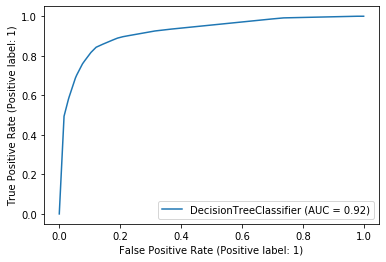

In [80]:
# Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [81]:
dt_base.score(X_train, y_train)

0.8759523809523809

In [82]:
dt_base.score(X_test, y_test)

0.8703477391400956

In [83]:
# Hyper-parameter tuning for the Decision Tree
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}


In [84]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [85]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [86]:
#accuracy
grid_search.best_score_

0.9425714285714286

In [87]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

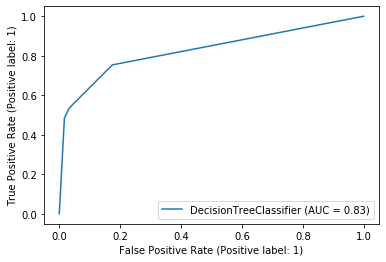

In [88]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

### Random Forest

In [89]:
# importing liabrary for random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True,class_weight='balanced')

In [90]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [91]:
rf.oob_score_

0.8639523809523809

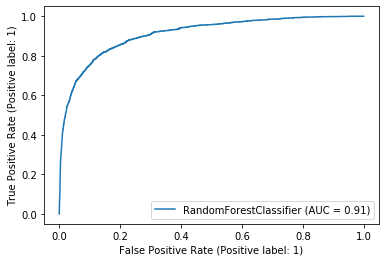

In [92]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [93]:
# Hyper-parameter tuning for the Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [94]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [95]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [96]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [97]:
grid_search.best_score_

0.9441428571428572

In [98]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

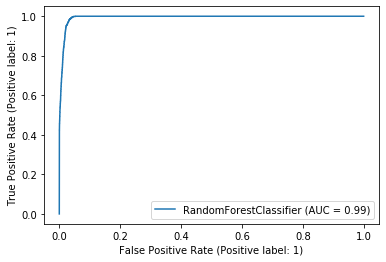

In [99]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [100]:
rf_best.feature_importances_

array([0.00815201, 0.00981214, 0.04299817, 0.00610179, 0.00576515,
       0.00582109, 0.0053784 , 0.00617123, 0.00864473, 0.00173007,
       0.00465867, 0.03575453, 0.00304889, 0.00809114, 0.04198772,
       0.00466308, 0.00540274, 0.00718772, 0.00468961, 0.0053201 ,
       0.01312625, 0.00245505, 0.00213836, 0.00401788, 0.00196883,
       0.00202931, 0.00413574, 0.00555165, 0.00574194, 0.01301945,
       0.00530891, 0.00447372, 0.00631107, 0.00564521, 0.00552365,
       0.00665182, 0.00059898, 0.00047949, 0.00761385, 0.        ,
       0.        , 0.        , 0.00649428, 0.00679427, 0.0056359 ,
       0.00145983, 0.00092512, 0.01226494, 0.00389889, 0.00406034,
       0.00445385, 0.00247662, 0.00036889, 0.03027666, 0.00600648,
       0.0088773 , 0.05534676, 0.00580188, 0.00562914, 0.01386645,
       0.0059089 , 0.00713098, 0.01821845, 0.00320736, 0.00376015,
       0.00467488, 0.00610622, 0.00724491, 0.02752222, 0.0043097 ,
       0.00423499, 0.00548518, 0.00419454, 0.00425427, 0.00607

In [101]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [102]:
# important predictors 
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
86,total_ic_mou_8,0.067434
56,total_og_mou_8,0.055347
2,arpu_8,0.042998
14,roam_og_mou_8,0.041988
104,max_rech_amt_8,0.035832
11,roam_ic_mou_8,0.035755
101,total_rech_amt_8,0.032909
53,og_others_8,0.030277
68,loc_ic_mou_8,0.027522
107,last_day_rch_amt_8,0.027212


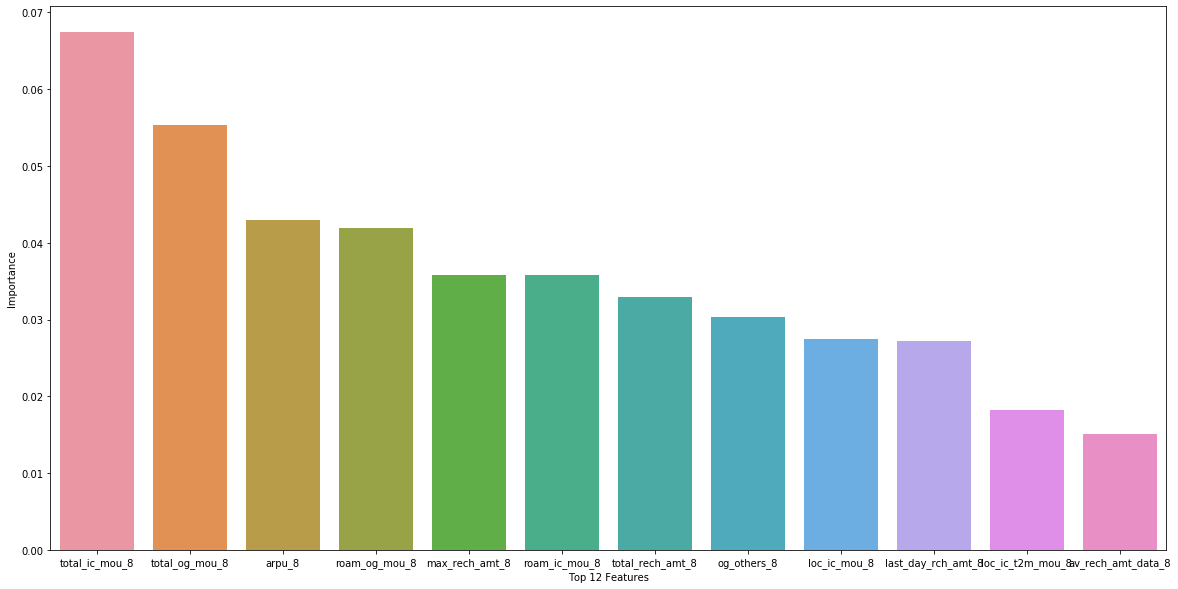

In [108]:
# Plot for top 12 IMPORTANT predictors 
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_df.sort_values(by="Imp", ascending=False)[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

From above it is clear that the factors affecting the churn are total_ic_mou_8 (Total incoming call: Minutes of usage in the action phase), total_og_mou_8(Total outgoing call: Minutes of usage in the action phase),arpu_8(Average revenue per user in month 8),roam_og_mou_8	(Roaming outgoing calls in the action phase), max_rech_amt_8(maximun recharge amount in the action phase), roam_ic_mou_8(Roaming incoming calls in the action phase),total_rech_amt_8(Total recharge amount in action phase), og_others_8(outgoing call to other in action phase)

#### Modeling and Results
As our problem definition is about predictive modeling and the task at hand is of classification, I started with simple logistic regression then I checked if Balancing the dataset got accuracy 78 percent. Then I moved on with decition tree where is got accuracy of 94 percent and at last did modeling with random forest. The model overfits the data even after a random hyperparameter search, early stopping can be used to stop overfitting.
##### At last I arrived at the conclusion that the Random forest model performs best out of all. I achieved AUC as 0.99.

#### Strategies to manage customer churn based on  observations
- Telecom company needs to pay attention to the customers who are using services from a roaming zone and provide quality of service.
- STD and ISD rates are too high thus need to provide discounts to customers according to their usage.
- Provide offers prior to 25th to reduce the churn, may be between 15th of the month to 25th of the month.
- Telecom company should collect customer query and complaint data and work on their services according to the needs of customers.